<a href="https://colab.research.google.com/github/karthik2411/NLP_Projects/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Logistic Regression***

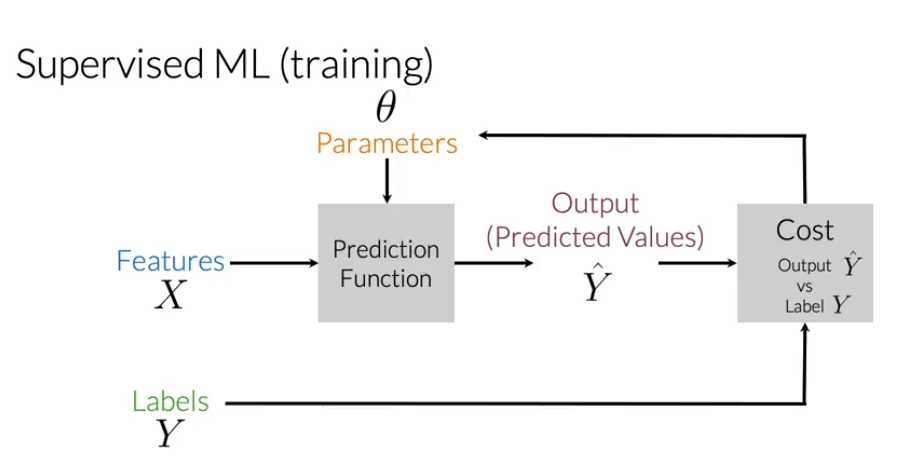

1.   Input Features  - X
2.   Set of lables   - Y
3.   Parameters Data - θ
4.   Predicted Output value - ŷ
5.   error rates or cost -Predicted Output value vs Label


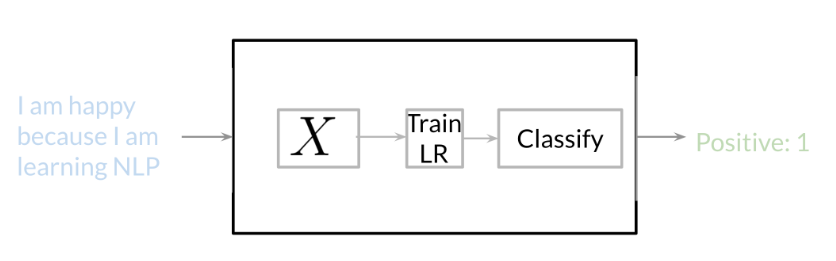

To perform sentiment analysis on a tweet, you first have to represent the text (i.e. "I am happy because I am learning NLP ") as features, you then train your logistic regression classifier, and then you can use it to classify the text

Note that in this case, you either classify 1, for a positive sentiment, or 0, for a negative sentiment.

# ***Vocabulary & Feature Extraction***

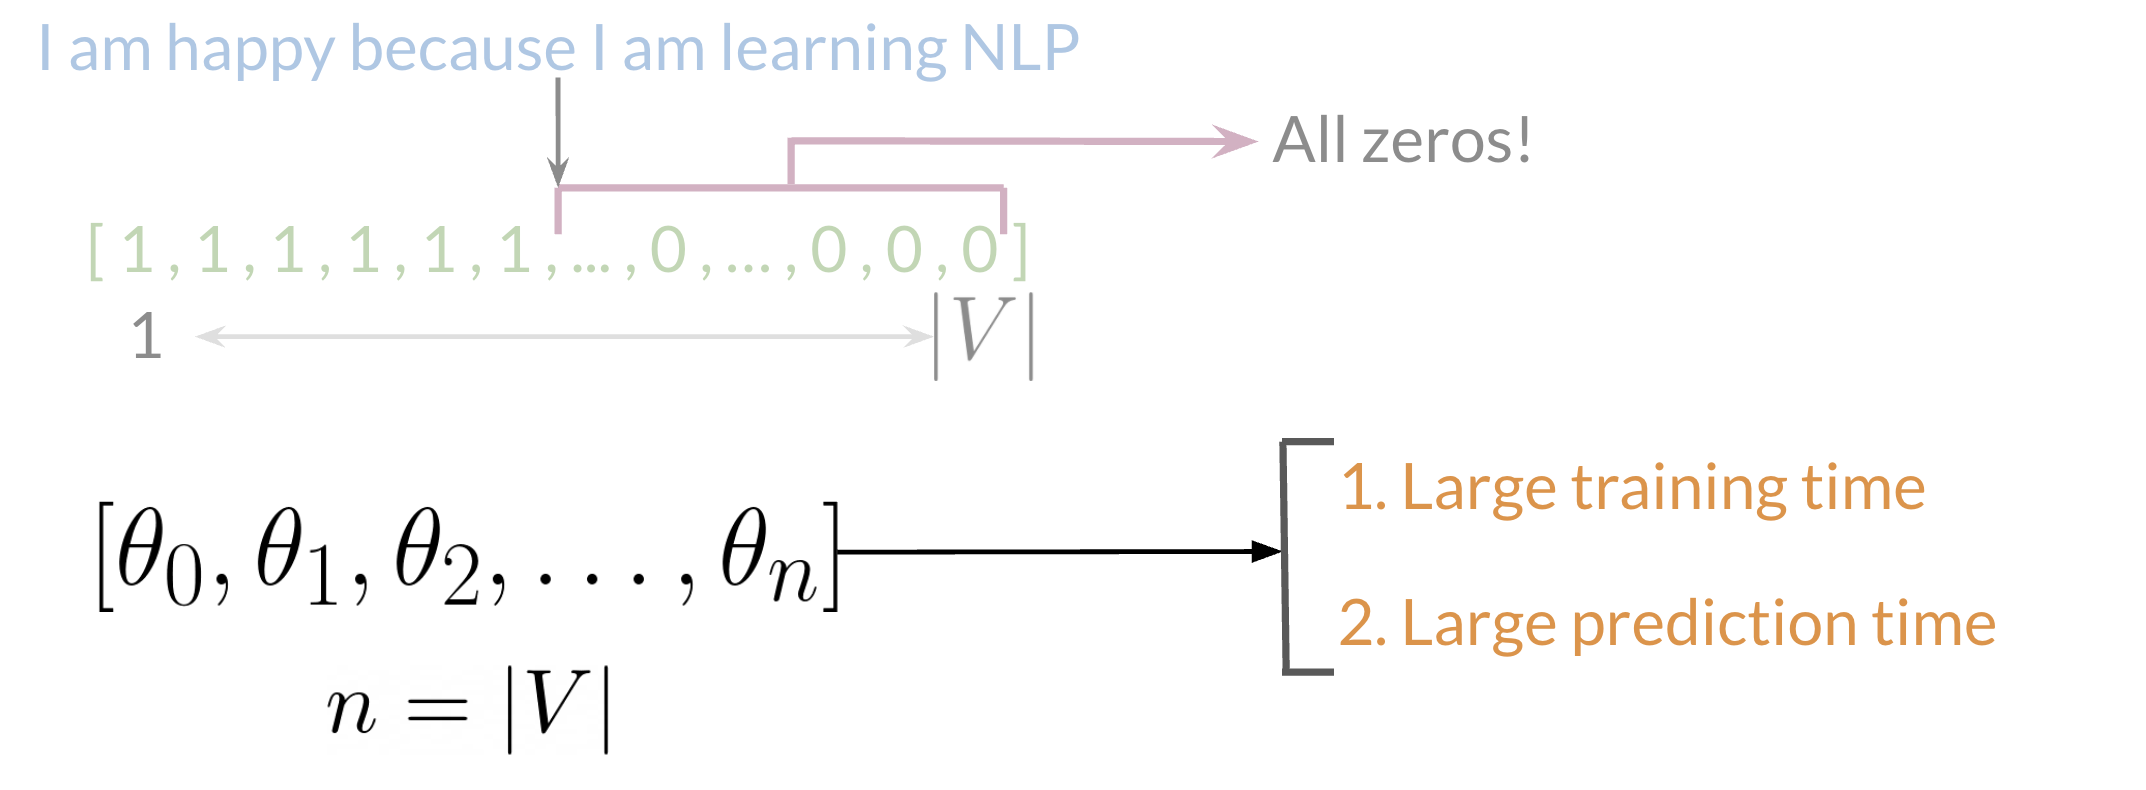

V gets larger, the vector becomes more sparse. Furthermore, we end up having many more features and end up training θV parameters. This could result in larger training time, and large prediction time.



# ***Feature Extraction with Frequencies***
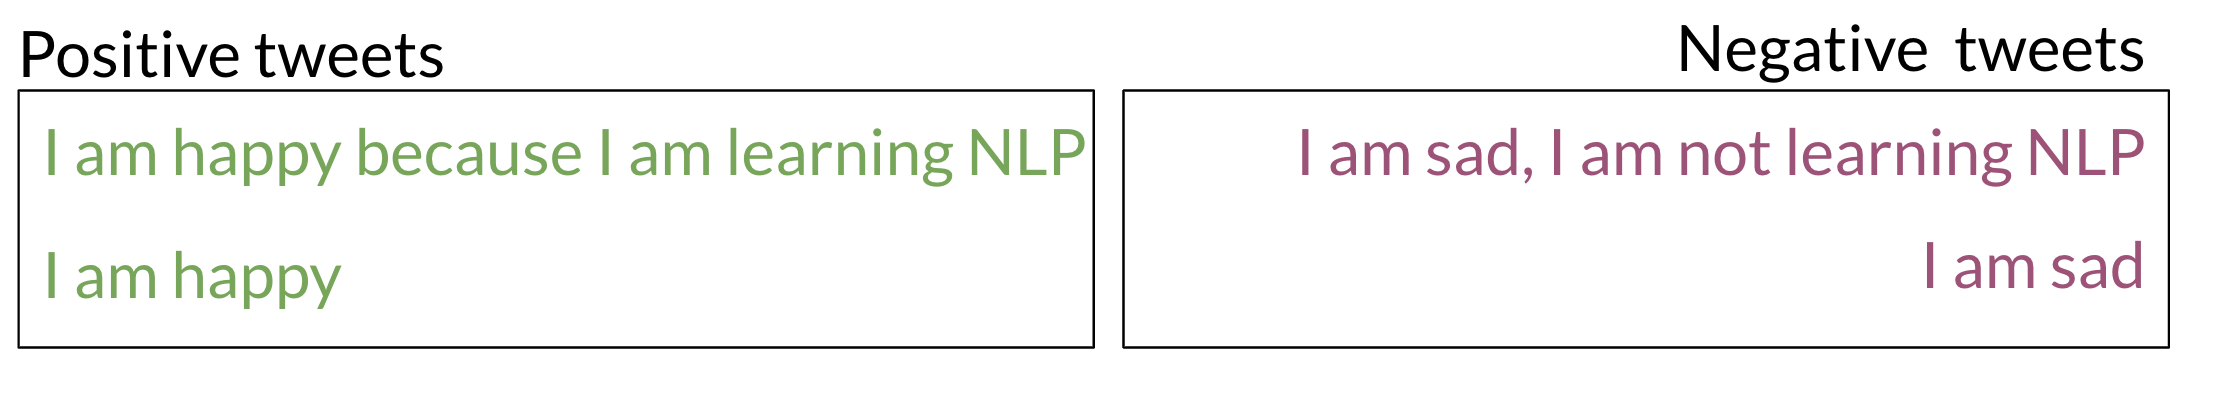

The above tweets can be represented as a vector of dimension 3. To do that, we have create a dictionary to map the word, and the class it appeared in (positive or negative) to the number of times that word appeared in its corresponding class.


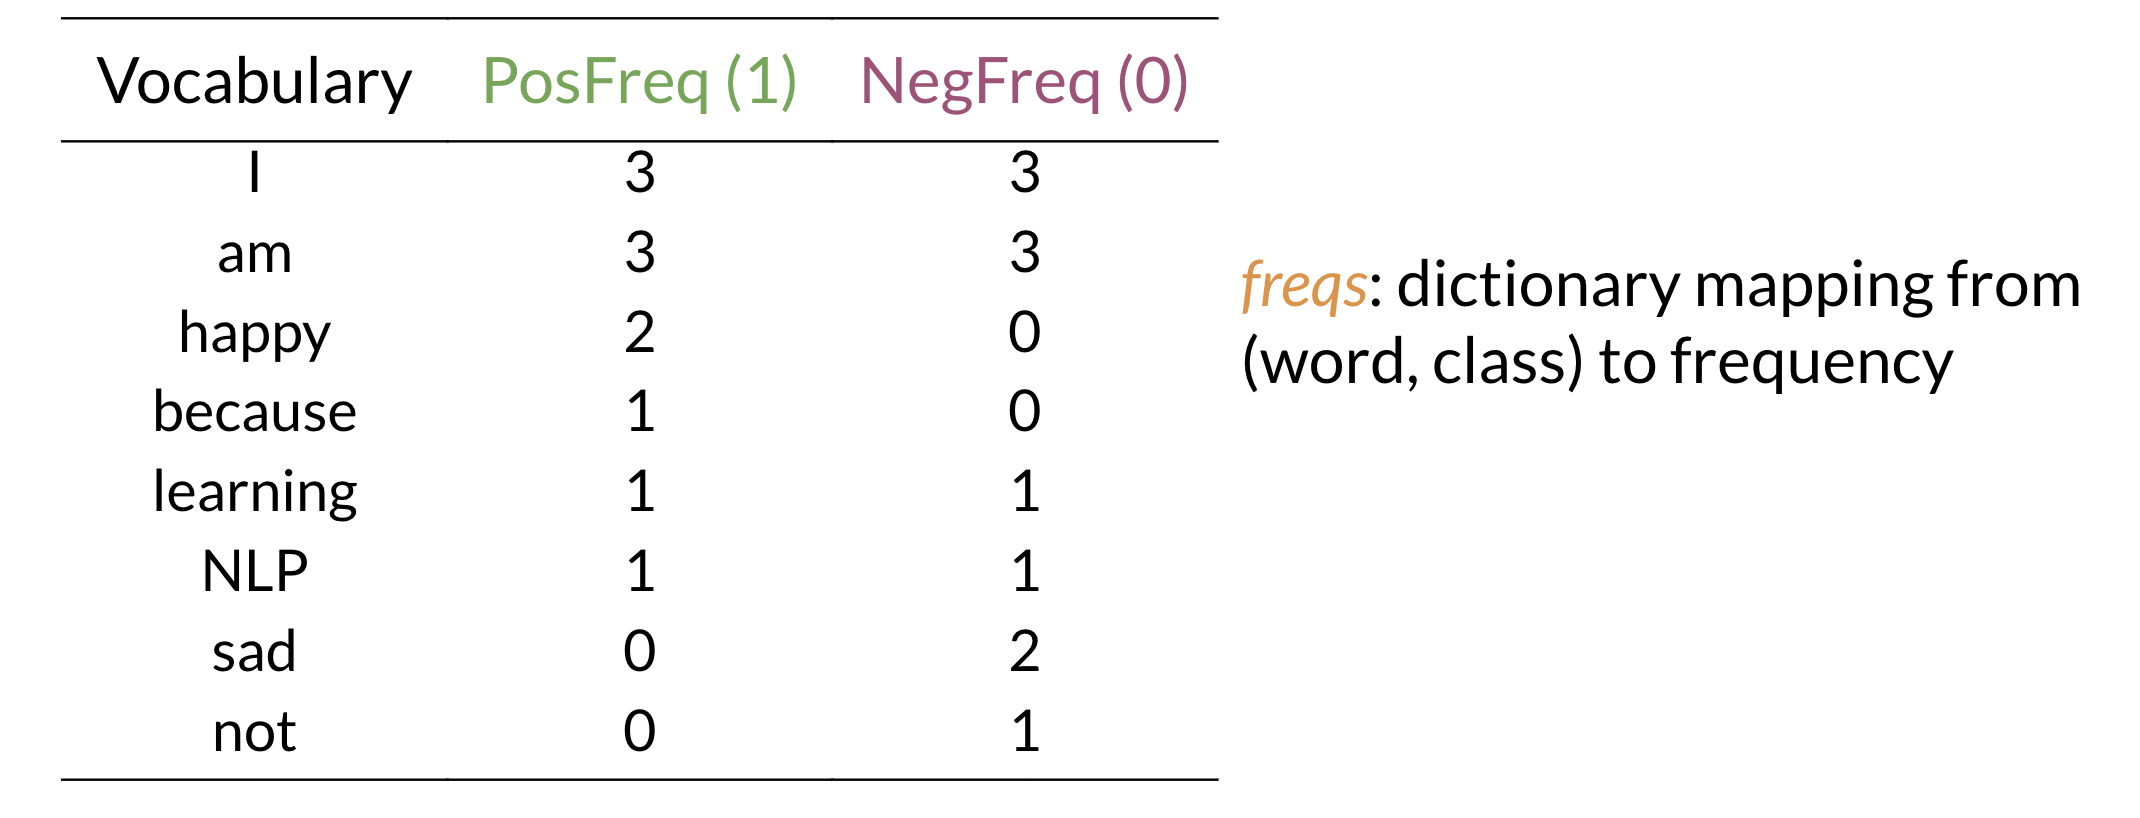

 Given this dictionary and the tweet, "I am sad, I am not learning NLP", you can create a vector corresponding to the feature as follows:

**To encode the Postove feature for the tweet **




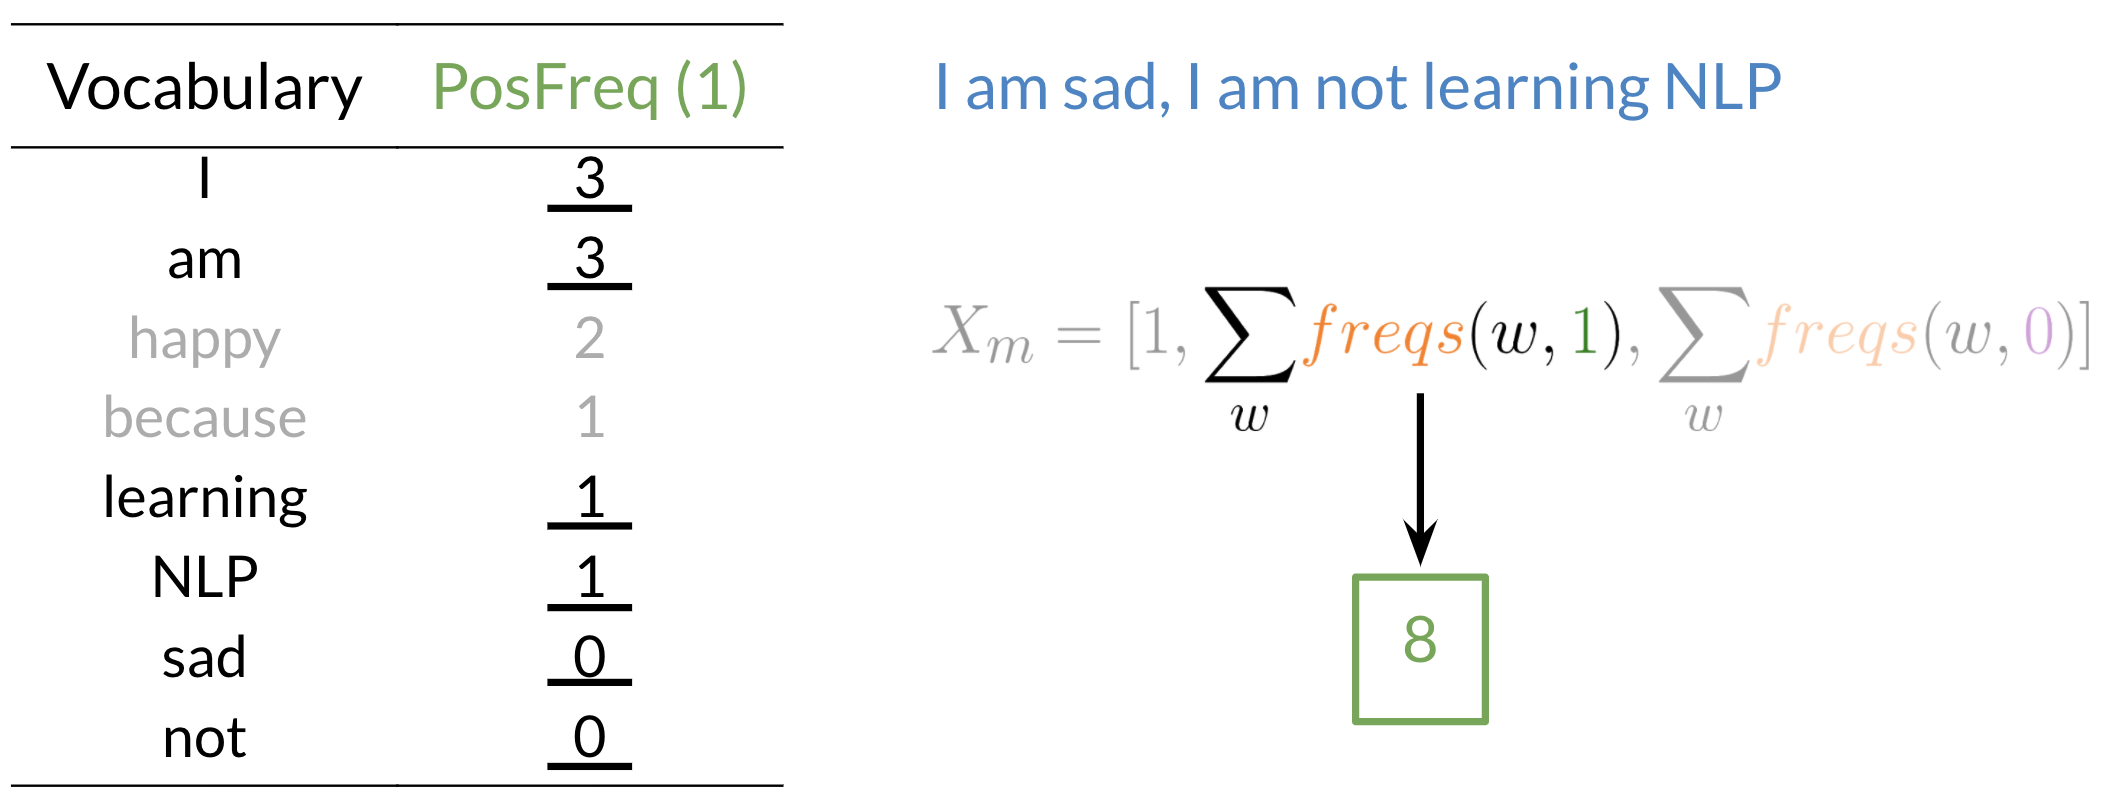

**To encode the negative feature, you can do the same thing**.

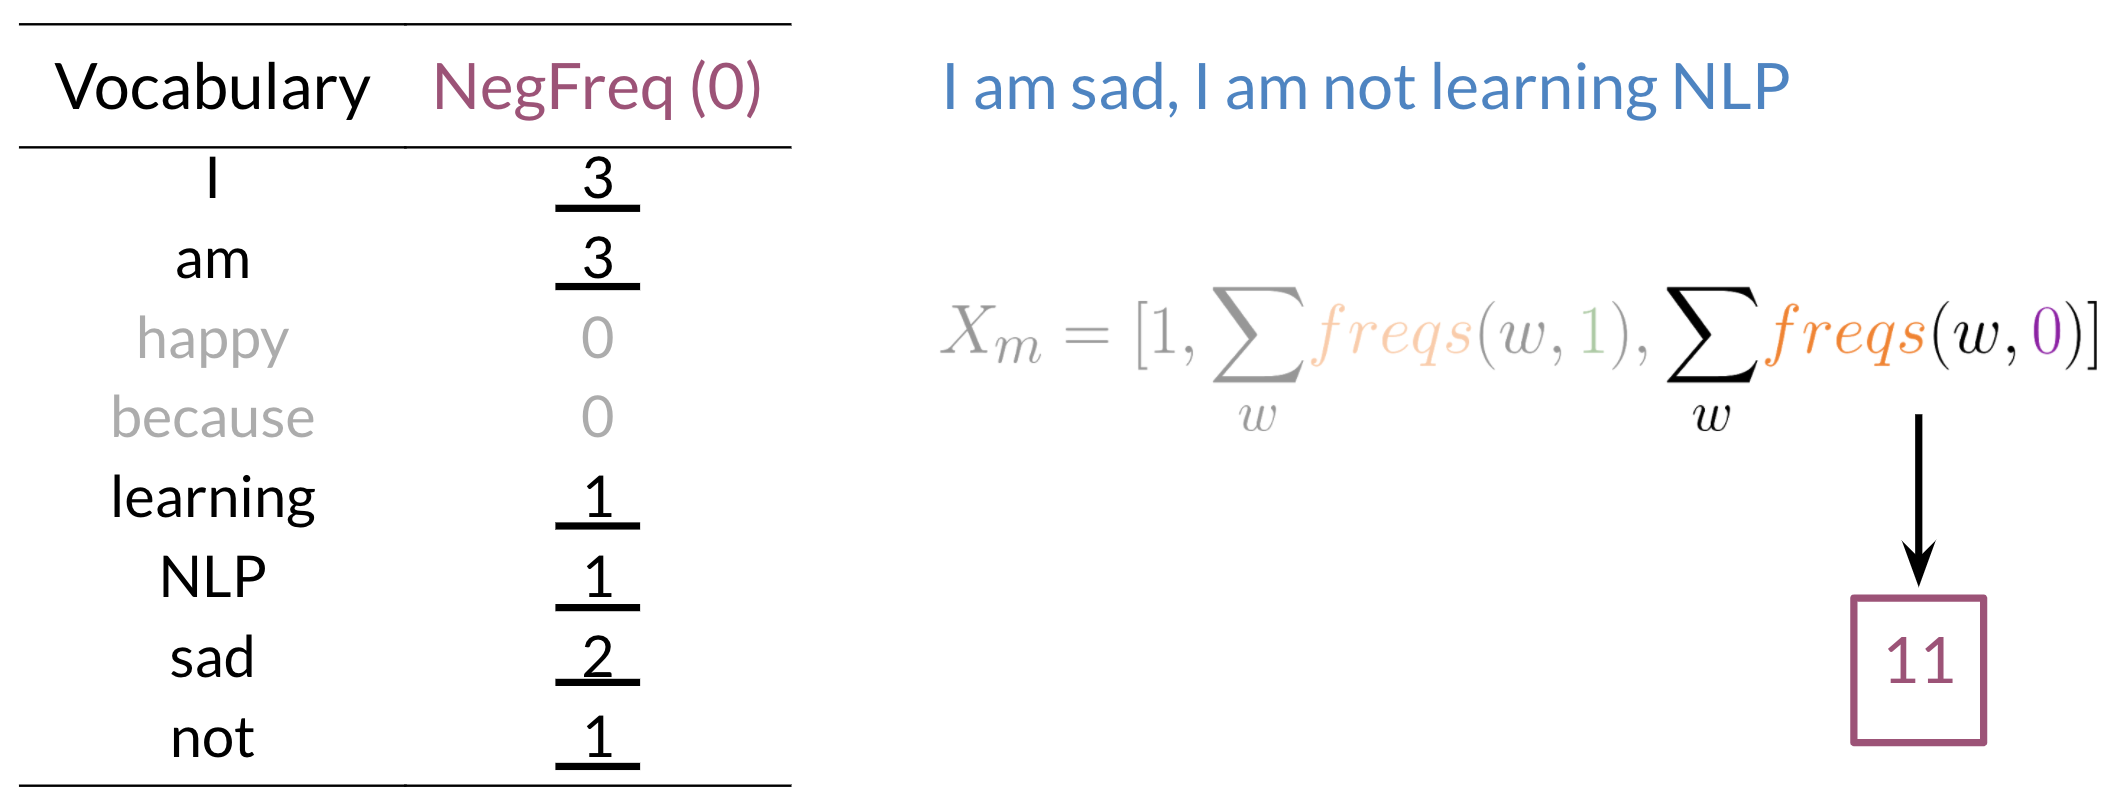

Hence you end up getting the following feature vector
[1,8,11]


1.   1 corresponds to the bias
2.   8 the positive feature
3.   11 the negative feature.

# ***Preprocessing***

1.   Eliminate handles and URLs
2.   Tokenize the string into words.
3.   Remove stop words like "and, is, a, on, etc."
4.   Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this.
5.   Convert all your words to lower case.




In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('The type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of all_negative_tweets is: ', type(all_negative_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
print('The type of a tweet entry is: ', type(all_positive_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000
The type of all_positive_tweets is:  <class 'list'>
The type of all_negative_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
The type of a tweet entry is:  <class 'str'>


# ***Preprocess raw text for Sentiment analysis***

In [ ]:
#Loading Required packages for Preprocessing
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
# Selecting a Tweet
tweet = all_positive_tweets[1997]
print(tweet)

@F_O_R_E_S_TBOY WEll if that was a heatwave, we've lowered our standards. :-)


In [ ]:
#downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print('\033[92m' + tweet)
print('\033[94m')

@F_O_R_E_S_TBOY WEll if that was a heatwave, we've lowered our standards. :-)



# ***Remove hyperlinks, Twitter marks and styles***


In [ ]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

In [ ]:
tweet2

"@F_O_R_E_S_TBOY WEll if that was a heatwave, we've lowered our standards. :-)"

In [ ]:
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

| Part         | Meaning                                                                                                                                               |
| ------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| `http`       | Matches the literal characters `http`.                                                                                                                |
| `s?`         | The `s` is **optional** (`?` means "0 or 1 occurrences"), so this allows for both `http` and `https`.                                                 |
| `://`        | Matches the literal characters `://`.                                                                                                                 |
| `[^\s\n\r]+` | Matches one or more (`+`) characters that are **not** (`^`) `\s` matches any whitespace character.whitespace, newline `\n`, or carriage return `\r`. This captures the **rest of the URL**. |


In [ ]:
tweet2

"@F_O_R_E_S_TBOY WEll if that was a heatwave, we've lowered our standards. :-)"

In [ ]:
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

In [ ]:
tweet2

"@F_O_R_E_S_TBOY WEll if that was a heatwave, we've lowered our standards. :-)"

# ***Tokenize the string***

In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

In [ ]:
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

In [ ]:
tweet_tokens

['well',
 'if',
 'that',
 'was',
 'a',
 'heatwave',
 ',',
 "we've",
 'lowered',
 'our',
 'standards',
 '.',
 ':-)']

# ***Remove stop words and punctuations***

In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')
print(stopwords_english)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
#Removing stop words and creating a new list
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

In [ ]:
tweets_clean

['well', 'heatwave', 'lowered', 'standards', ':-)']

# ***Stemming***

temming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy
happiness
happier
We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen

In [ ]:
# Instantiate stemming class
stemmer = PorterStemmer()

In [ ]:
# Create an empty list to store the stems
tweets_stem = []

In [ ]:
for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

In [ ]:
tweets_stem

['well', 'heatwav', 'lower', 'standard', ':-)']